## User Purchased
#### 1.Life cycle of Machine learning Project
#### 2.Understanding the Problem Statement
#### 3.Data Collection
#### 4.Data Checks to perform
#### 5.Exploratory data analysis
#### 6.Data Pre-Processing
#### 7.Model Training
#### 8.Choose best model


## Problem Statment
#### The objective of this project is to build a machine learning model that can predict whether a
#### user will purchase a product or service based on their demographic and behavioral data

## Data Collection
#### Dataset Source - https://www.kaggle.com/datasets/sandragracenelson/user-data/data
#### The data consists of 4 column and 400 rows.

## Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Import the CSV Data as Pandas DataFrame

In [ ]:
data = pd.read_csv('ads_data.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.drop('User ID',axis=1,inplace=True)


#### Show Top 5 Records

In [ ]:
data.head()

In [7]:
data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


### Dataset information
#### Gender : sex of employee -> (Male/female)
#### Age 
#### EstimatedSalary
#### Purchased 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
# Checking Null Values
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
# Checking Total Rows & columns
print('Number of rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of rows 400
Number of Columns 4


In [16]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [18]:
data.describe(include='O')

,Gender
count,400
unique,2
top,Female
freq,204


##  Exploring Data ( Visualization )
#### Visualize average score distribution to make some conclusion.
#### Histogram
#### Kernel Distribution Function (KDE)
#### Histogram & KDE

In [19]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [25]:
data1 = data[['Age', 'EstimatedSalary', 'Purchased']]
data2 = data[['Gender']]

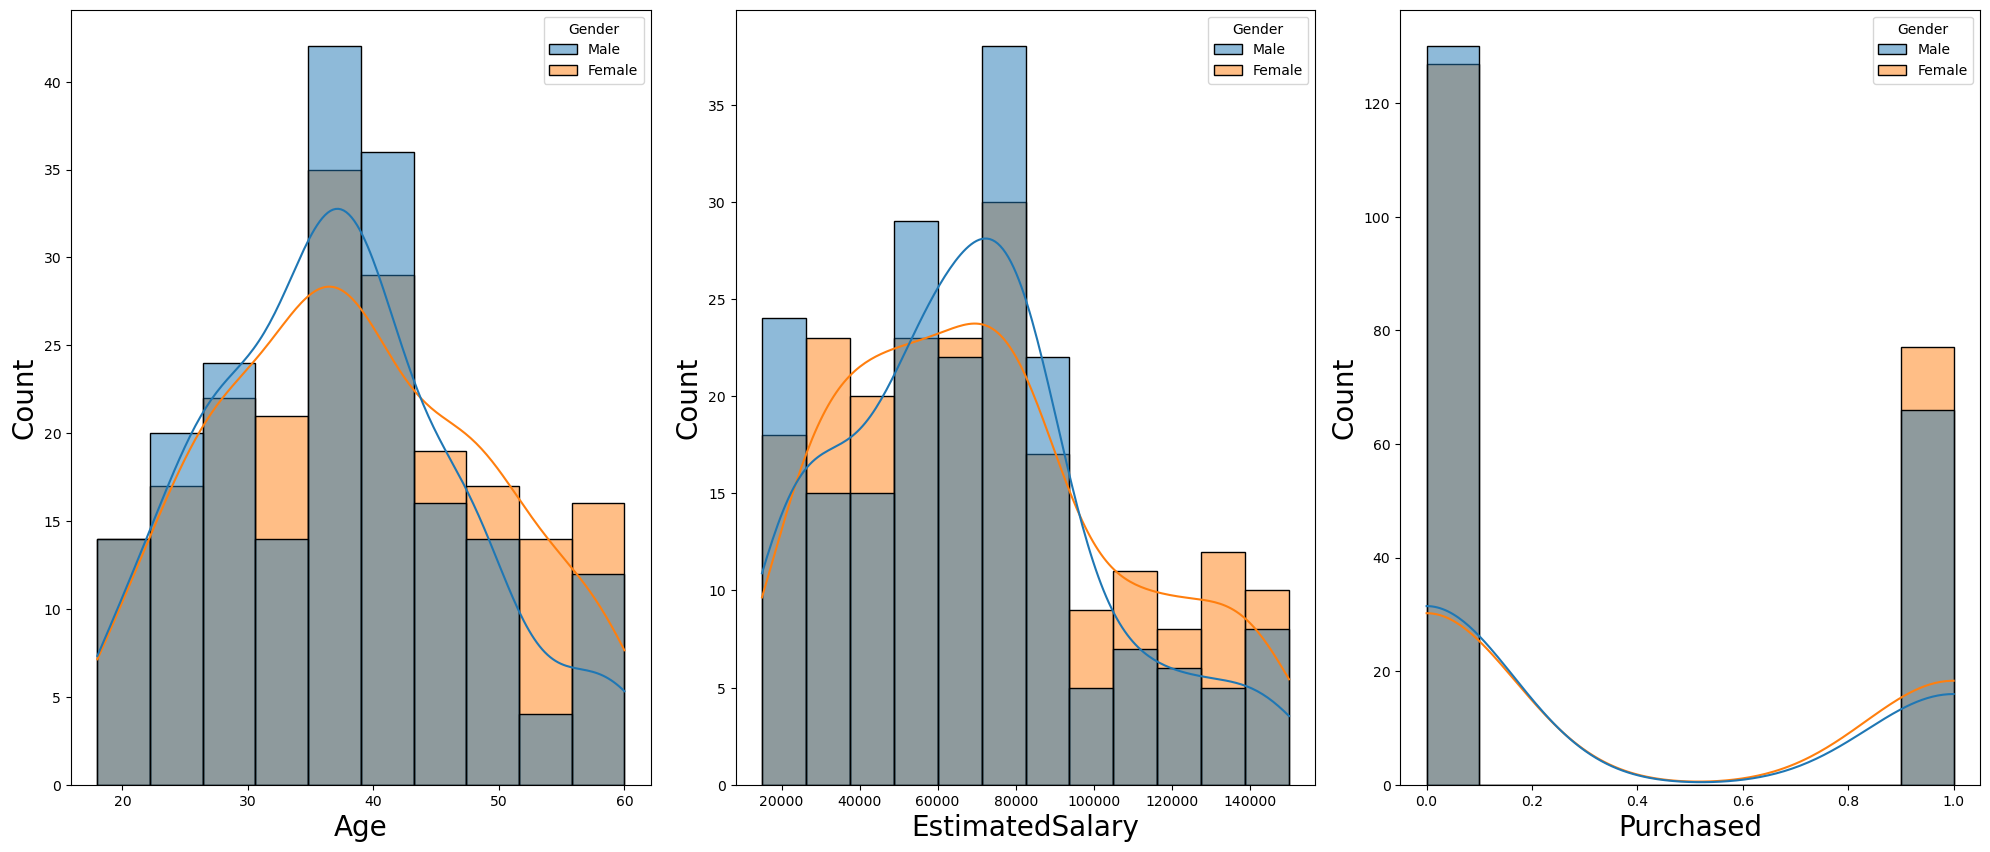

In [28]:
# Plotting Histogram for Numerical value
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1  # counter

for column in data1:
    if plotnumber<=5:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data1[column],hue=data['Gender'],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()
        

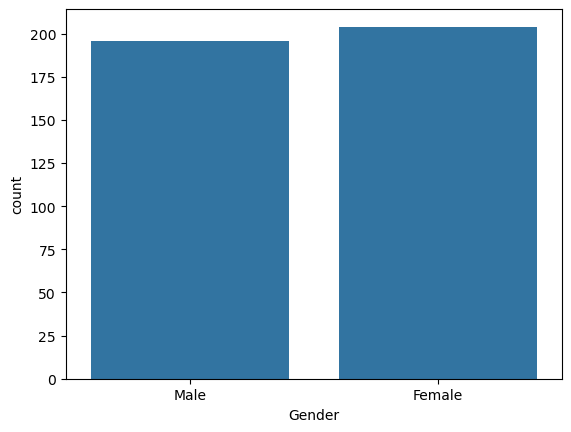

In [31]:
# For Categorical
sns.countplot(x='Gender', data=data2)
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

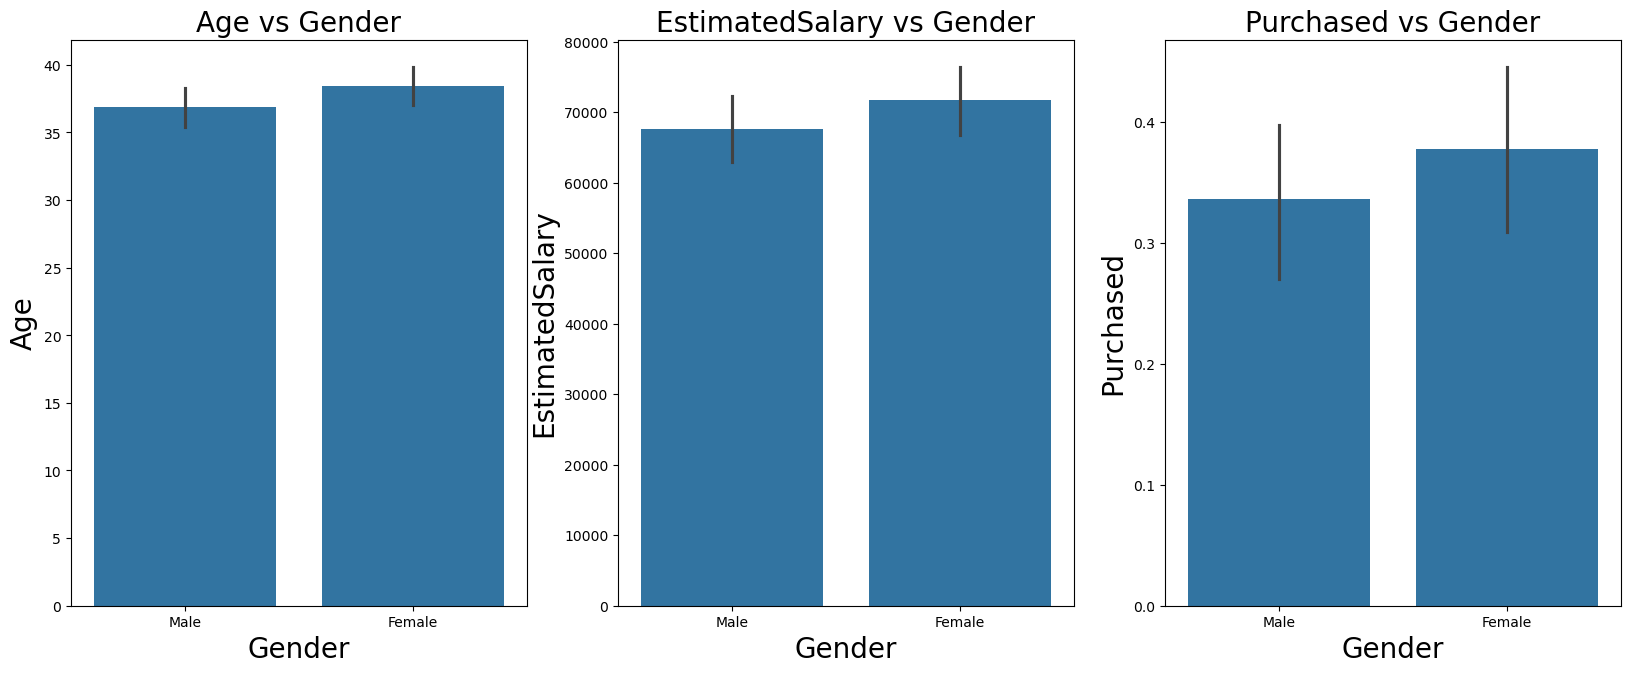

In [35]:
# Categorical vs Numerical

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1  # counter

for column in data1:
    if plotnumber <= 5:
        ax = plt.subplot(3, 3, plotnumber)
        sns.barplot(x=data['Gender'], y=data1[column], ax=ax)
        plt.xlabel('Gender', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plt.title(f'{column} vs Gender', fontsize=20)
    plotnumber += 1

plt.tight_layout

### Multivariate analysis using pairplot

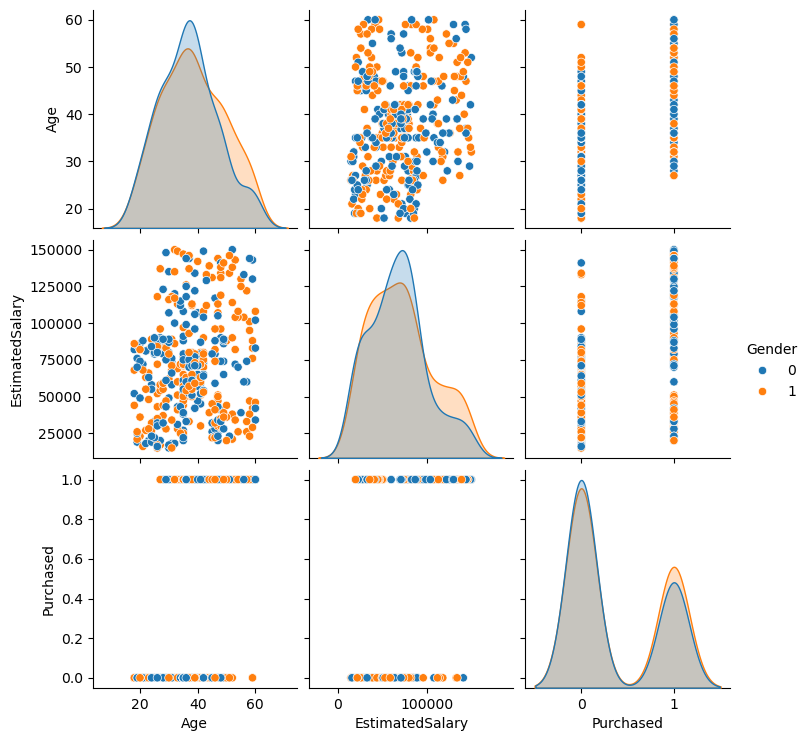

In [68]:
sns.pairplot(data,hue = 'Gender')
plt.show()

### Handling Null value

In [67]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### There is no null values

### Handling Outliers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

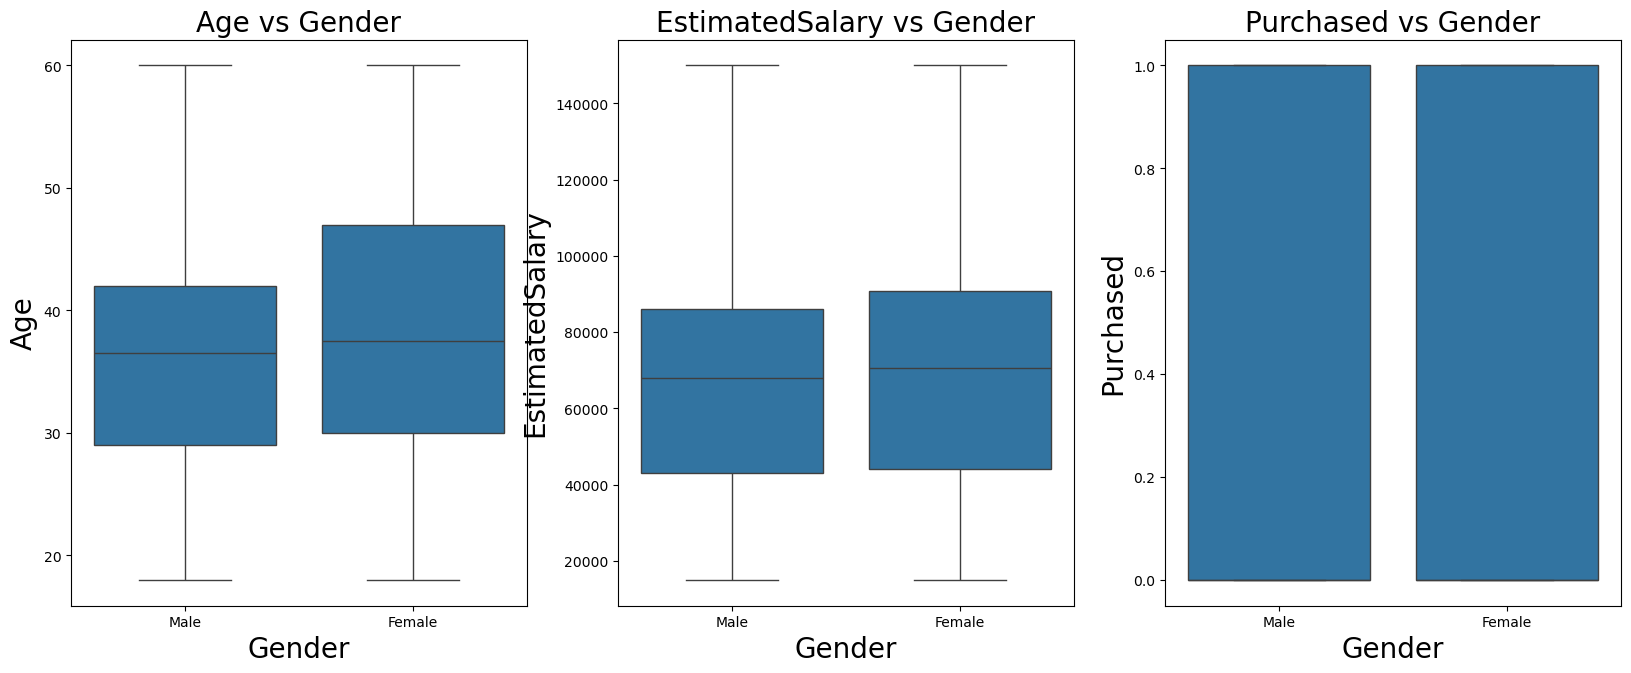

In [36]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1  # counter

for column in data1:
    if plotnumber <= 5:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(x=data['Gender'], y=data1[column], ax=ax)
        plt.xlabel('Gender', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plt.title(f'{column} vs Gender', fontsize=20)
    plotnumber += 1

plt.tight_layout

### There is no Outliers

## Encoding 

In [ ]:
# using manual encoding

In [37]:
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_8536\1912326072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})


In [38]:
data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# Conclusion

# Model Creation

In [ ]:
# Splitting for Training and Testing data


In [40]:
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [42]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

##### LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



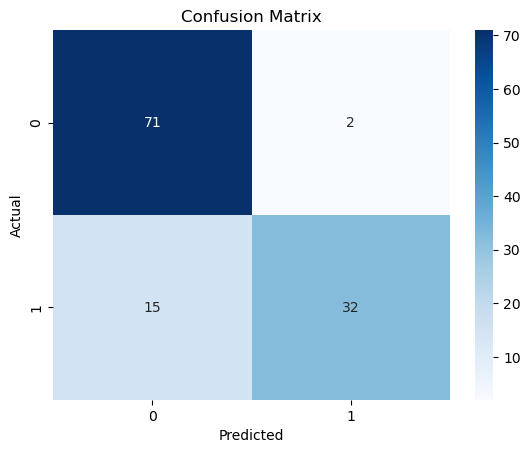

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [54]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test_scaled)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



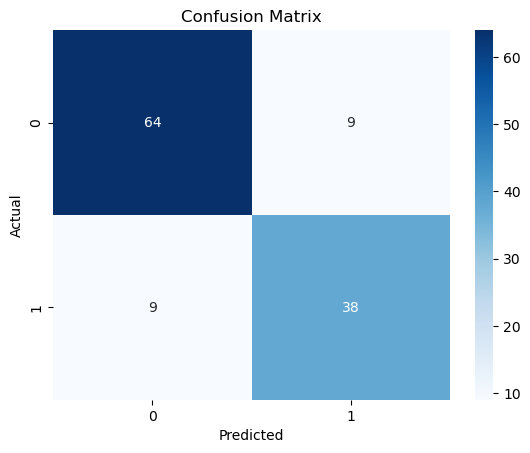

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Model

In [58]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)  # Or use X_train without scaling

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       0.89      0.85      0.87        47

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



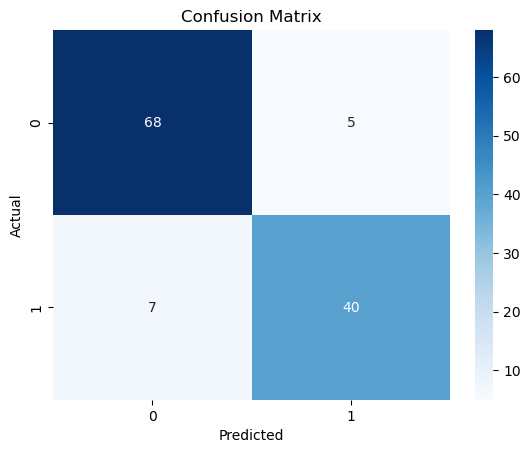

In [60]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [62]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [63]:
# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best model accuracy on training (CV)
print("Best CV accuracy:", grid_search.best_score_)

# Test on real unseen data
y_pred = grid_search.predict(X_test_scaled)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 50}
Best CV accuracy: 0.9
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.90      0.96      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [70]:
models = {
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,LogisticRegression,0.178571,0.141667,0.207428,0.405421
1,Decision Tree,0.001786,0.133333,0.992074,0.440396
2,Random Forest,0.014784,0.070526,0.934384,0.704000
